In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df_col = ["sentence","brand_name","info","index","content","total","thank_you"]
y_col = ["brand_name","info","index","content","total","thank_you"]


In [74]:
train_df = pd.read_csv('30-07-data-vi.csv',   encoding='utf-8')
train_df.head()

,sentence,brand_name,info,index,content,total,thank_you
0,FC GOOD COFEE,1,0,0,0,0,0
1,"ĐC: 126 Lai Hùng Cường, Vĩnh Lọc B,",0,1,0,0,0,0
2,"Bình Chánh, TpHCM",0,1,0,0,0,0
3,ĐT: 0934145879,0,1,0,0,0,0
4,HOA DON BAN HANG,0,1,0,0,0,0


In [76]:
def count_pandas(df,row):
    new_pandas = df.query(row+">0")
    return new_pandas.shape[0]

# count_pandas(train_df,"info")

[146, 289, 148, 331, 192, 101]


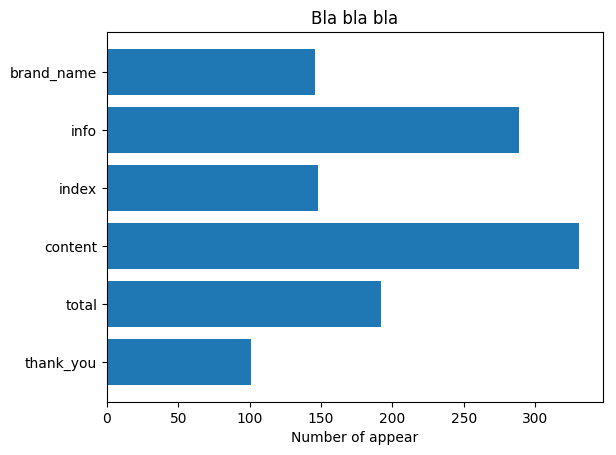

In [77]:
# Explore data
plt.rcdefaults()
fig, ax = plt.subplots()
# Example data

y_pos = np.arange(len(y_col))
performance = []

for col in y_col:
    performance.append(count_pandas(train_df,col))

print(performance)
error = np.random.rand(len(people))

ax.barh(y_col, performance, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(y_col)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of appear')
ax.set_title('Bla bla bla')

plt.show()

In [79]:
import numpy as np
import os
import pickle
from keras.optimizers import SGD, Adam, Nadam, RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from keras.preprocessing import sequence
from keras.models import Sequential,Model,load_model
from keras.layers import Embedding,Conv1D,MaxPooling1D
from keras.layers.core import Dense, Activation,Dropout ,Flatten
from keras.layers.recurrent import LSTM
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import sequence
from keras.preprocessing.text import text_to_word_sequence,one_hot,Tokenizer
from keras.constraints import maxnorm
from keras.callbacks import ModelCheckpoint,TensorBoard, ReduceLROnPlateau,EarlyStopping
from keras.applications import Xception
from keras import regularizers
from keras import backend as K
import keras
import numpy as np
import pandas as pd
import cv2
import os
import glob
import math
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [80]:
seed = 120
np.random.seed(seed)
train_df = shuffle(train_df)
train_df.head()

,sentence,brand_name,info,index,content,total,thank_you
345,| 17 Te muỗi Hà BLL} sso so =a sn,0,1,0,0,0,0
1028,Heo rừng nướng ngữ vị,0,0,0,1,0,0
1141,Ngày: 06/04/2018 Giờ: 18:25:23,0,1,0,0,0,0
327,Mi xảo bò,0,0,0,1,0,0
684,CHICKEN,1,0,0,0,0,0


In [81]:
X_train = train_df["sentence"].fillna("fillna").values
Y_train = train_df[['brand_name', 'info', 'index', 'content', 'total', 'thank_you']].values

In [82]:
print("Shape of X_train:",X_train.shape)
print("Shape of Y_train:",Y_train.shape)

Shape of X_train: (1207,)
Shape of Y_train: (1207, 6)


In [83]:
Tokenizer = Tokenizer()
print(X_train[0])
print("(Input->Sentence) Length of X_train:",X_train.shape) # Input -> Input
print("(output->Labels) Length of Y_train:",Y_train.shape) # output -> Labels
texts = X_train
print(texts[1])

| 17 Te muỗi Hà BLL} sso so =a sn
(Input->Sentence) Length of X_train: (1207,)
(output->Labels) Length of Y_train: (1207, 6)
Heo rừng nướng ngữ vị


In [84]:
Tokenizer.fit_on_texts(texts) 
Tokenizer_vocab_size = len(Tokenizer.word_index) + 1
print("Tokenizer vocabulary size:",Tokenizer_vocab_size)
len(max(X_train,key=len))

Tokenizer vocabulary size: 1505


45

In [85]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2)
print("(Input->Sentence) Length of X_train:",X_train.shape) # Input -> Input
print("(output->Labels) Length of Y_train:",Y_train.shape) # output -> Labels

(Input->Sentence) Length of X_train: (965,)
(output->Labels) Length of Y_train: (965, 6)


In [86]:
X_train_encoded_words = Tokenizer.texts_to_sequences(X_train)
X_val_encoded_words = Tokenizer.texts_to_sequences(X_val)

In [88]:
print("(output->Labels) Length of Y_train:",Y_train.shape) # output -> Labelsprint("(Input->Sentence)

(output->Labels) Length of Y_train: (965, 6)


In [87]:
maxWordCount= 900
maxDictionary_size=Tokenizer_vocab_size
X_train_encoded_padded_words = sequence.pad_sequences(X_train_encoded_words, maxlen=maxWordCount)
X_val_encoded_padded_words = sequence.pad_sequences(X_val_encoded_words, maxlen=maxWordCount)

In [89]:
print("(Input->Sentence) Length of X_train:",X_train_encoded_padded_words.shape) # Input -> Input
print("(output->Labels) Length of Y_train:",Y_train.shape) # output -> Labels

(Input->Sentence) Length of X_train: (965, 900)
(output->Labels) Length of Y_train: (965, 6)


In [90]:
print(Y_train.shape)
print(Y_val.shape)

(965, 6)
(242, 6)


In [91]:
# Model

model = Sequential()

model.add(Embedding(maxDictionary_size, 32, input_length=maxWordCount)) #to change words to ints
# model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
# model.add(MaxPooling1D(pool_size=2))
# model.add(Dropout(0.5))
# model.add(Conv1D(filters=32, kernel_size=2, padding='same', activation='relu'))
# model.add(MaxPooling1D(pool_size=2))
 #hidden layers
model.add(LSTM(10))
# model.add(Flatten())
model.add(Dropout(0.6))
model.add(Dense(1200, activation='relu',W_constraint=maxnorm(1)))
# model.add(Dropout(0.6))
model.add(Dense(500, activation='relu',W_constraint=maxnorm(1)))

# model.add(Dropout(0.5))
 #output layer
model.add(Dense(6, activation='softmax'))

# Compile model
# adam=Adam(lr=learning_rate, beta_1=0.7, beta_2=0.999, epsilon=1e-08, decay=0.0000001)

model.summary()

W0730 23:22:15.897935 4458964416 deprecation_wrapper.py:119] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0730 23:22:15.950245 4458964416 deprecation_wrapper.py:119] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0730 23:22:15.974750 4458964416 deprecation_wrapper.py:119] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0730 23:22:16.185577 4458964416 deprecation_wrapper.py:119] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:13

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 900, 32)           48160     
_________________________________________________________________
lstm_1 (LSTM)                (None, 10)                1720      
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1200)              13200     
_________________________________________________________________
dense_2 (Dense)              (None, 500)               600500    
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 3006      
Total params: 666,586
Trainable params: 666,586
Non-trainable params: 0
_________________________________________________________________


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1200, activation="relu", kernel_constraint=<keras.con...)`
  from ipykernel import kernelapp as app
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(500, activation="relu", kernel_constraint=<keras.con...)`


In [92]:
learning_rate=0.0001
epochs = 25
batch_size = 32 #32
sgd = SGD(lr=learning_rate, nesterov=True, momentum=0.7, decay=1e-4)
Nadam = keras.optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=1e-08, schedule_decay=0.004)
model.compile(loss='categorical_crossentropy', optimizer=Nadam, metrics=['accuracy'])

W0730 23:22:28.834578 4458964416 deprecation_wrapper.py:119] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0730 23:22:28.844316 4458964416 deprecation_wrapper.py:119] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [93]:
print(X_train_encoded_padded_words.shape)
print(Y_train.shape)

print(X_val_encoded_padded_words.shape)
print(Y_val.shape)

(965, 900)
(965, 6)
(242, 900)
(242, 6)


In [94]:
history  = model.fit(X_train_encoded_padded_words,Y_train, epochs = epochs, batch_size=batch_size, verbose=1,
validation_data=(X_val_encoded_padded_words, Y_val))

W0730 23:22:53.707194 4458964416 deprecation.py:323] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 965 samples, validate on 242 samples
Epoch 1/25
965/965 [==============================] - 14s 15ms/step - loss: 1.5924 - acc: 0.3440 - val_loss: 1.2165 - val_acc: 0.5207
Epoch 2/25
965/965 [==============================] - 15s 15ms/step - loss: 1.0630 - acc: 0.5668 - val_loss: 0.8544 - val_acc: 0.6198
Epoch 3/25
965/965 [==============================] - 16s 16ms/step - loss: 0.7711 - acc: 0.6632 - val_loss: 0.7156 - val_acc: 0.6653
Epoch 4/25
965/965 [==============================] - 13s 14ms/step - loss: 0.6287 - acc: 0.7358 - val_loss: 0.6377 - val_acc: 0.7355
Epoch 5/25
965/965 [==============================] - 14s 14ms/step - loss: 0.5145 - acc: 0.7876 - val_loss: 0.8113 - val_acc: 0.7107
Epoch 6/25
965/965 [==============================] - 14s 15ms/step - loss: 0.4498 - acc: 0.8280 - val_loss: 0.8473 - val_acc: 0.7562
Epoch 7/25
965/965 [==============================] - 14s 14ms/step - loss: 0.4006 - acc: 0.8570 - val_loss: 0.7443 - val_acc: 0.7231
Epoch 8/25
965/9

In [95]:
score = model.evaluate(X_val_encoded_padded_words, Y_val, verbose=1)
print('Test accuracy:', score[1],'%')

242/242 [==============================] - 0s 2ms/step
Test accuracy: 0.7644628089321547 %


In [98]:
phrase = "Điện thoại: 09038786"
tokens = Tokenizer.texts_to_sequences([phrase])
tokens = pad_sequences(tokens, maxlen=900)
prediction = model.predict(np.array(tokens))
i_raw,j_raw = np.where(prediction == prediction.max()) #calculates the index of the maximum element of the array across all axis
# i->rows, j->columns
i = int(i_raw)
j = int(j_raw)
print(prediction[0][j])
print(j_raw)
total_possible_outcomes = ['brand_name', 'info', 'index', 'content', 'total', 'thank_you']
print("Result:",total_possible_outcomes[j])

0.99790716
[1]
Result: info
